<a href="https://colab.research.google.com/github/ProData-Emmanuel/Hamoye-Winter-2022-Internship/blob/main/Emmanuel_Okeke_Stage_B_Quiz_Hamoye_Winter_2022_Intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This NoteBook, modeling solution involving Multiple Linear Regression model (Ordinary Least Sqaure), Ridge Regression Model, and Lasso Regression model are presented. Comparisons between the results are made to determine the model with the least mean square error. The table draw the best comparison for easy review.

Details of the project can be found in the **ReadMe Markdown** File in the GitHub, including link to the dataset.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'
df = pd.read_csv(url, index_col='date')

In [3]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Data Cleaning

In [4]:
df.shape

(19735, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

In [6]:
df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

### Statistical Analysis of the Dataset

In [7]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Correlation Analysis

In [8]:
cormat = df.corr()

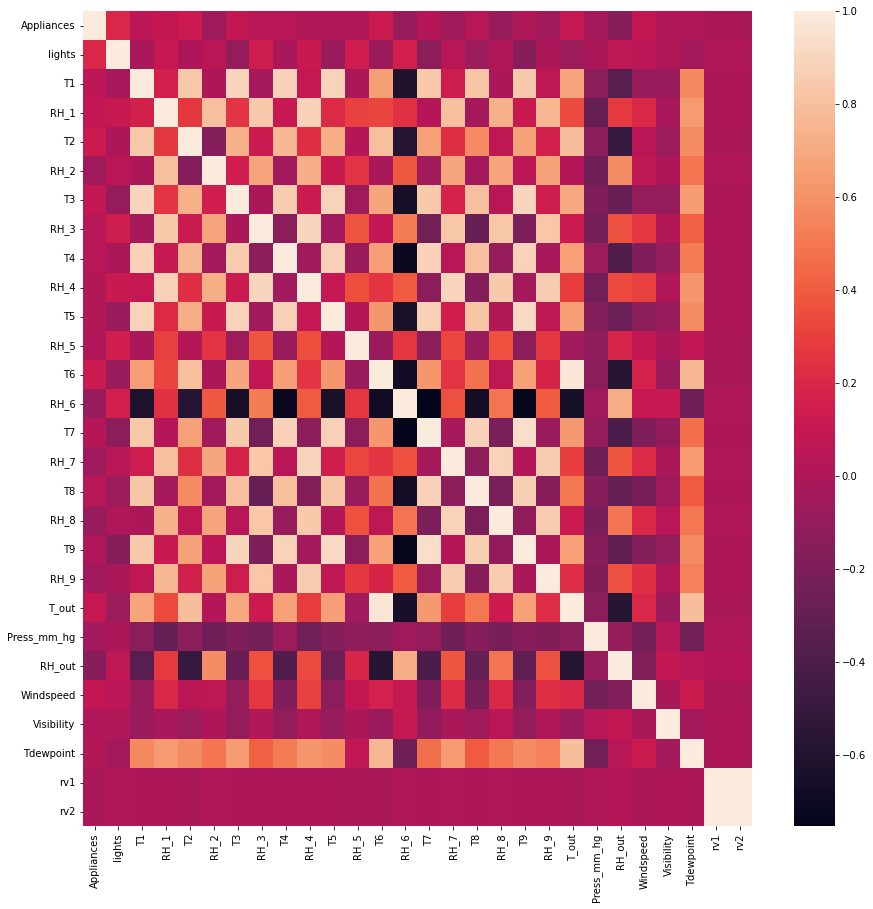

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cormat);

**We can see that some feattures are positively or negatively correlated. Thus, pernalization will likely improve our model**

In [10]:
df=df.drop(columns=['lights'], axis=1)

In [11]:
df.shape

(19735, 27)

### Preprocessing

In [12]:
#irstly, let's normalise our dataset to  common scale using MiniMasScaler 

from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler() 

In [13]:
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [14]:
features_df = normalised_df.drop(columns=['Appliances'])
Appliances_target = normalised_df['Appliances'] 

In [15]:
# Import Splitting module from Sci-kit Learn Library
from sklearn.model_selection import train_test_split

In [16]:
# Split the Dataset
x_train, x_test, y_train, y_test = train_test_split(features_df, Appliances_target, test_size=0.3, random_state=42)

### Building a Multiple Linear Regression 

In [17]:
# Import the Linear model
from sklearn import linear_model
linear_model = linear_model.LinearRegression()

In [18]:
# Fitting the Linear Model to the training Dataset
linear_model.fit(x_train, y_train)

LinearRegression()

In [19]:
# Evaluating the multiple Linear model on the test set
predicted_values = linear_model.predict(x_test)

In [20]:
predicted_values

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

### Model Metrics: Measuring the performance of the Multiple Linear Regression Model (Least Sqaures)

In [21]:
# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.05

In [22]:
# Residual Sum of Squares (RSS)
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2) 

45.35

In [23]:
# Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.088

In [24]:
# R-Squared or Coefficient of Determination
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.15

## Training Regularized Linear Regression or Penalized Linear Regression (Model)

#### 1.  Training a Lasso Regression Model

In [25]:
# Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)

In [26]:
lasso_reg.fit(x_train, y_train) 

Lasso(alpha=0.001)

In [27]:
lasso_pred = lasso_reg.predict(x_test)

In [28]:
lasso_pred

array([0.07370267, 0.08143458, 0.07716072, ..., 0.07792848, 0.09034412,
       0.08359255])

#### Model Metrics: Measuring the performance of the model for the Lasso Linear Model

In [29]:
# Residual Sum of Squares (RSS) for the Lasso Model
import numpy as np
rss = np.sum(np.square(y_test - lasso_pred))
round(rss, 2) 

51.85

In [30]:
# R-Squared or Coefficient of Determination
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, lasso_pred)
round(r2_score, 2)

0.03

In [31]:
# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, lasso_pred)
round(mae, 2)

0.06

In [32]:
# Root Mean Square Error (RMSE) -- Lasso
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
round(rmse, 3) 

0.094

#### 2. Training a Ridge Regression Model

In [33]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [34]:
ridge_pred = ridge_reg.predict(x_test) 

In [35]:
ridge_pred

array([0.03321872, 0.24043824, 0.03461337, ..., 0.06872351, 0.10025536,
       0.05851175])

In [36]:
# Root Mean Square Error (RMSE) -- Ridge
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
round(rmse, 3) 

0.088

In [37]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    
# This function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [38]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,T2,-0.236178,-0.201397,0.000000
3,T9,-0.189941,-0.188916,-0.000000
4,RH_8,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
6,RH_7,-0.044614,-0.045977,-0.000000
7,RH_9,-0.039800,-0.041367,-0.000000
8,T5,-0.015657,-0.019853,-0.000000
9,T1,-0.003281,-0.018406,0.000000


### Fitting a Simple Linear Regression Model of one independent variable, T2, and one dependent variable, T6

In [39]:
#features_df = normalised_df.drop(columns=['Appliances'])
#Appliances_target = normalised_df['Appliances'] 

X = features_df['T2'].values.reshape(-1,1) # Changing the T2 feature to ID from 2D
Y = features_df['T6'].values.reshape(-1,1) # # Changing the T6 feature to ID from 2D

In [40]:
# Import the Linear model
from sklearn import linear_model
simple = linear_model.LinearRegression()

In [41]:
# Fit simple linear model
simple.fit(X,Y)

LinearRegression()

In [42]:
#Find Coefficient of the Linear Equation, Y = mx + c
simple.coef_

array([[0.89097447]])

In [43]:
# Find the Intercept
simple.intercept_

array([0.13211951])

In [44]:
# Predict with simple linear model fitted
simple_pred = simple.predict(X)

In [45]:
# R-Squared or Coefficient of Determination of the Simple linear Regression Model
from sklearn.metrics import r2_score
r2_score = r2_score(Y, simple_pred)
round(r2_score, 2)

0.64